# Evaluación 3

## Ejercicio 1

### 1.1 Check if your country is a polygon or multipolygon

In [10]:
import os
import geopandas as gpd
from  fiona import listlayers
import matplotlib.pyplot as plt

In [2]:
peruMaps = "https://github.com/IntroSpatialDataScience/geodfEv3/raw/main/maps/peru_24891.gpkg"

In [3]:
listlayers(peruMaps)

['country', 'cities', 'rivers']

In [4]:
#Obtenemos cada mapa:
peru = gpd.read_file(peruMaps,layer="country")
peru_cities = gpd.read_file(peruMaps,layer = "cities")
peru_rivers = gpd.read_file(peruMaps,layer = "rivers")

In [6]:
#Luego, notamos que Peru es un POLIGONO
peru

,COUNTRY,geometry
0,Peru,"POLYGON ((1423874.178 857804.844, 1423768.489 ..."


### 1.2 Recover just the boundaries of that country

In [9]:
#Notamos que el borda está formado por una sola línea
peru.boundary

0    LINESTRING (1423874.178 857804.844, 1423768.48...
dtype: geometry

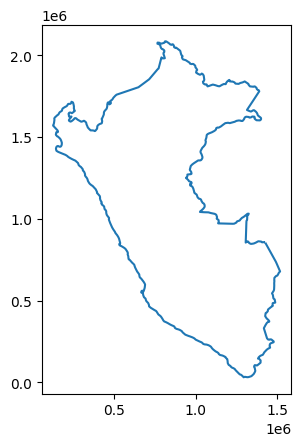

In [12]:
peru.boundary.plot()
plt.show()

### 1.3 Turn the boundary into a GDF

In [13]:
type(peru.boundary)

geopandas.geoseries.GeoSeries

In [14]:
peru.boundary.to_frame()

,0
0,"LINESTRING (1423874.178 857804.844, 1423768.48..."


In [15]:
peru_boundary = peru.boundary.to_frame()

In [16]:
peru_boundary["name"]="Peru"
peru_boundary

,0,name
0,"LINESTRING (1423874.178 857804.844, 1423768.48...",Peru


In [21]:
peru_boundary.rename(columns={0:"geometry"},inplace=True)
peru_boundary = peru_boundary.set_geometry("geometry")
peru_boundary

,geometry,name
0,"LINESTRING (1423874.178 857804.844, 1423768.48...",Peru


## Ejercicio 2

De aquí extraje el archivo shp de los bordes de Perú [here](https://data.humdata.org/dataset/cod-ab-per)

In [ ]:
https://data.humdata.org/dataset/ourairports-per
https://data.humdata.org/dataset/world-bank-energy-and-mining-indicators-for-peru
https://data.humdata.org/dataset/peru-healthsites
